In [2]:
# Importing the 'drive' module from the 'google.colab' library
from google.colab import drive

# Mounting the Google Drive to the '/gdrive' directory
drive.mount('/gdrive')


Mounted at /gdrive


In [3]:
# Defining the path to the Kaggle directory on Google Drive
path = "/gdrive/MyDrive/Kaggle"

# Importing the 'os' module
import os

# Setting the 'KAGGLE_CONFIG_DIR' environment variable to the specified path
os.environ['KAGGLE_CONFIG_DIR'] = path

In [4]:
# Changing the current working directory to "/content/drive/MyDrive/Kaggle"
%cd "/gdrive/MyDrive/Kaggle"

/gdrive/MyDrive/Kaggle


In [5]:
!kaggle datasets download -d petitbonney/cifar10-image-recognition

100% 957M/961M [00:17<00:00, 22.9MB/s]
100% 961M/961M [00:18<00:00, 55.6MB/s]


In [8]:
!unzip \*.zip

Archive:  cifar10-image-recognition.zip
  inflating: sampleSubmission.csv    
  inflating: test.npy                
  inflating: train.npy               
  inflating: trainLabels.csv         


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from PIL import ImageFont
import warnings
warnings.filterwarnings('ignore')

# **Load dataset**

In [6]:
# Importing the CIFAR-10 dataset from Keras
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


Number of training samples: 50000
Number of testing samples: 10000
Image shape: (32, 32, 3)
Number of classes: 10


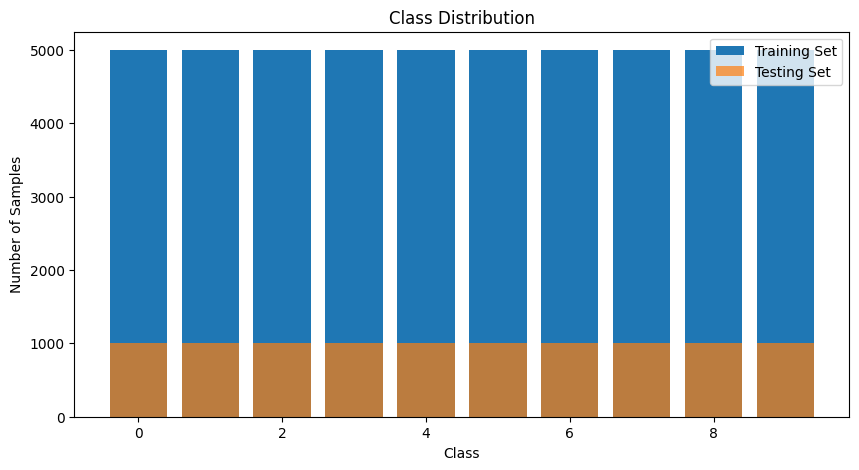

In [7]:
# Display dataset information
print("Number of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0])
print("Image shape:", X_train.shape[1:])
print("Number of classes:", len(np.unique(Y_train)))

# Display distribution of data entries among classes
class_distribution_train = np.bincount(Y_train.flatten())
class_distribution_test = np.bincount(Y_test.flatten())

plt.figure(figsize=(10, 5))
plt.bar(range(10), class_distribution_train, label='Training Set')
plt.bar(range(10), class_distribution_test, label='Testing Set', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.legend()
plt.show()


# **Prepare the model**

In [13]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder


# Define the input layer
input_layer = Input(shape=(32, 32, 3))

# Convolutional layers
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(64, (3, 3), activation='relu')(pool2)

# Flatten layer
flatten = Flatten()(conv3)

# Dense layers
dense1 = Dense(64, activation='relu')(flatten)
output_layer = Dense(10, activation='softmax')(dense1)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

encoder = OneHotEncoder()
Y_train_encoded = encoder.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_test_encoded = encoder.transform(Y_test.reshape(-1, 1)).toarray()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          3692

# **Train the model**

In [14]:
history = model.fit(X_train, Y_train_encoded, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set



Epoch 1/20
625/625 [==============================] - 5s 5ms/step - loss: 1.9510 - accuracy: 0.3548 - val_loss: 1.5557 - val_accuracy: 0.4505
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 1.3690 - accuracy: 0.5095 - val_loss: 1.3610 - val_accuracy: 0.5164
Epoch 3/20
625/625 [==============================] - 5s 8ms/step - loss: 1.2113 - accuracy: 0.5731 - val_loss: 1.2255 - val_accuracy: 0.5677
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 1.1011 - accuracy: 0.6122 - val_loss: 1.1277 - val_accuracy: 0.6010
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 1.0203 - accuracy: 0.6425 - val_loss: 1.1001 - val_accuracy: 0.6169
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.9441 - accuracy: 0.6687 - val_loss: 1.1487 - val_accuracy: 0.6027
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 0.8796 - accuracy: 0.6925 - val_loss: 1.0916 - val_accuracy: 0.6346
Epoch 

Task 3: Evaluation and Visualization
Evaluate the model's performance on the test set using appropriate metrics.
Visualize the model's predictions on test images.

# **Evaluate the model**

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 1.1742 - accuracy: 0.6368
Test Loss: 1.1742075681686401
Test Accuracy: 0.6367999911308289


313/313 [==============================] - 1s 3ms/step


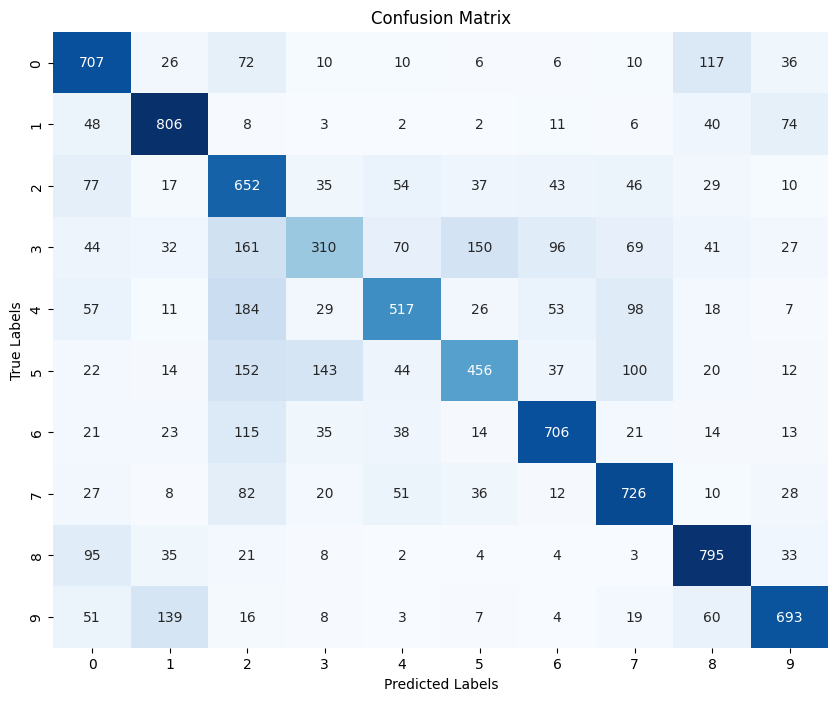

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes for the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test_encoded, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


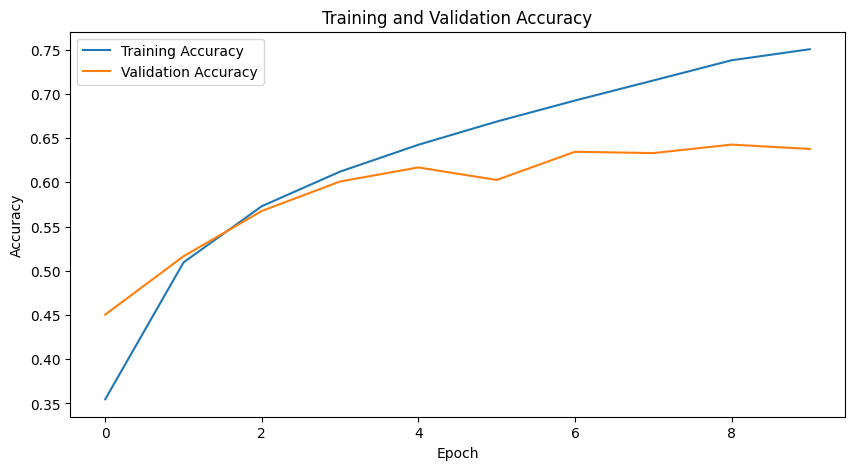

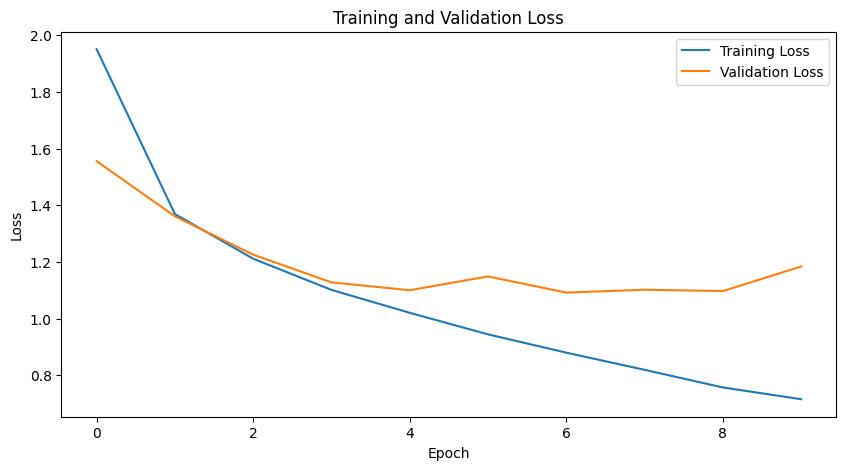

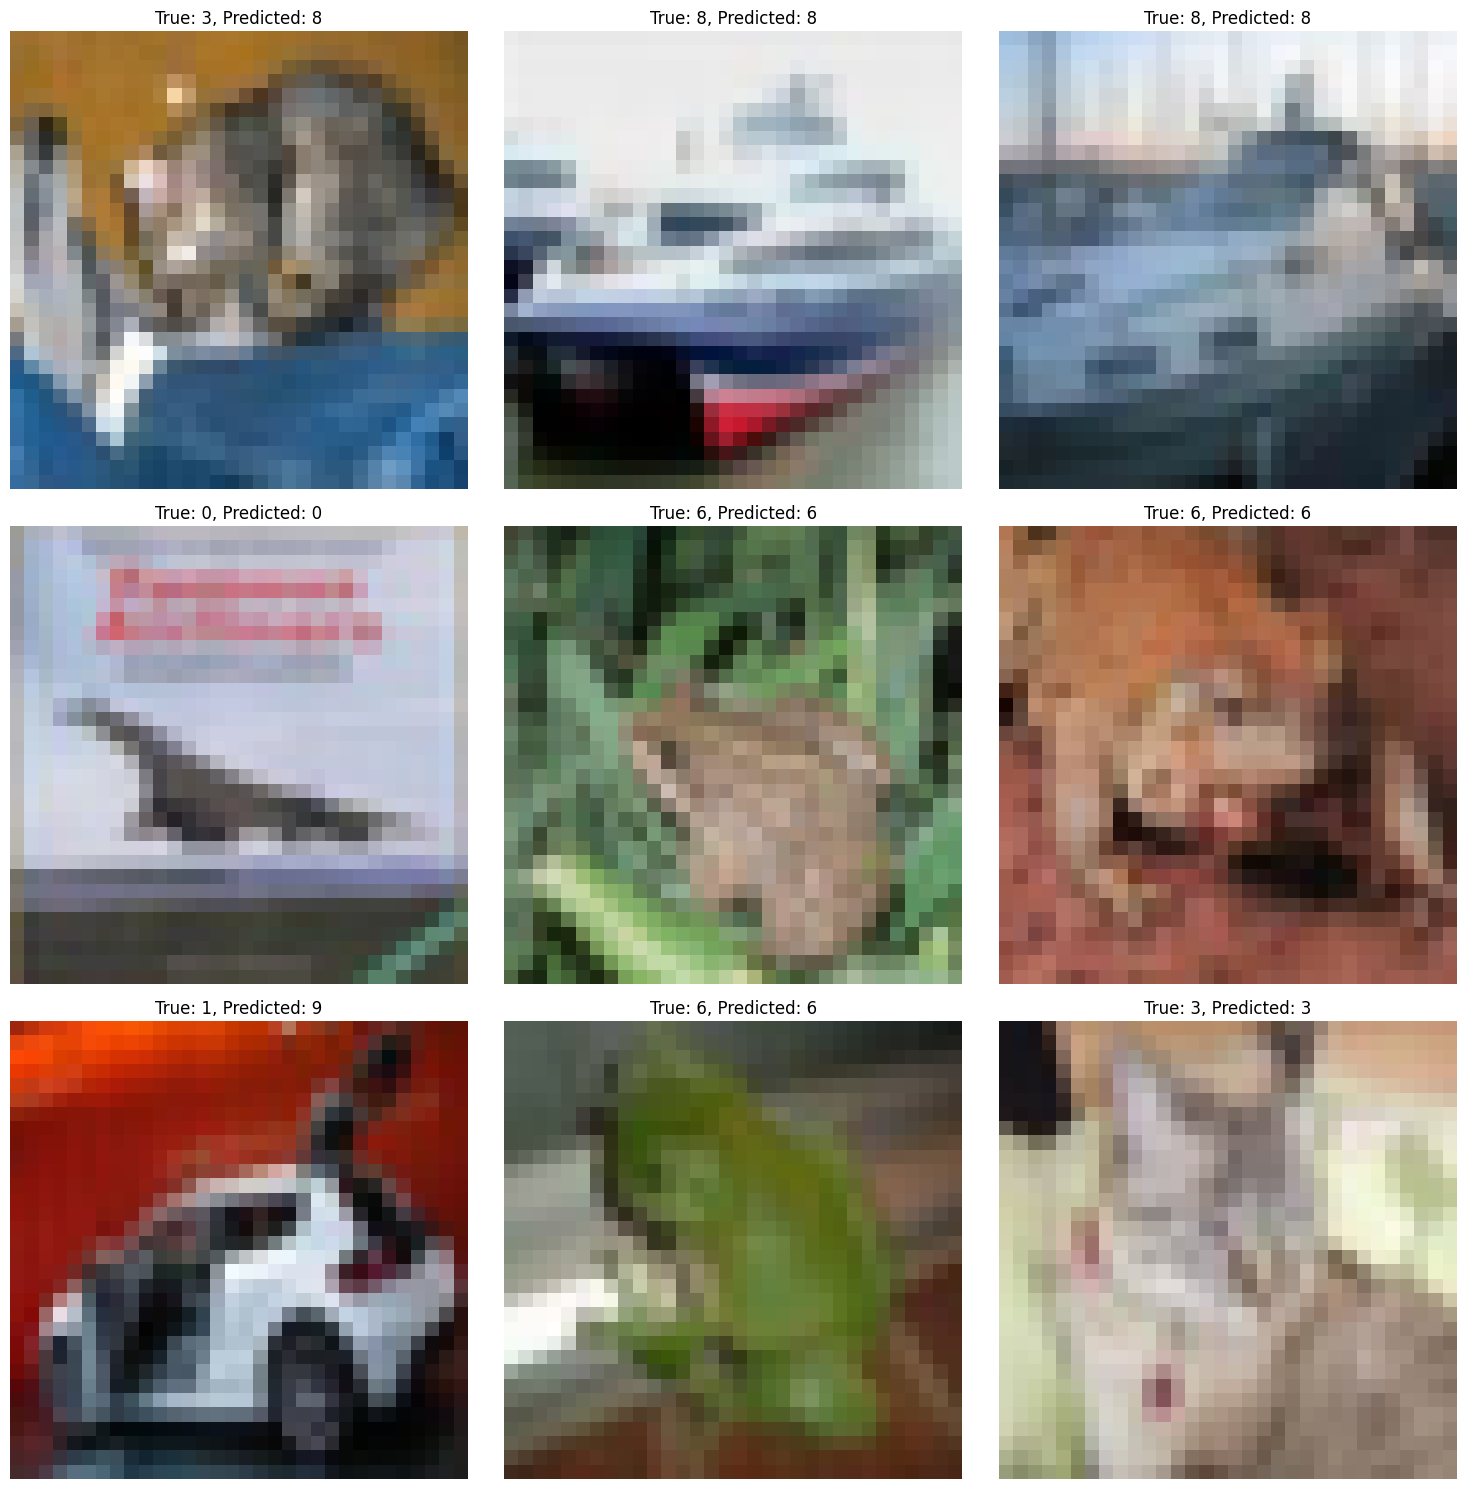

In [35]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Visualize predictions on test images
num_images = 9
plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i])
    plt.title(f'True: {Y_true[i]}, Predicted: {Y_pred_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


# **Use the trained model in detecting objects**

In [19]:
image_path = "/gdrive/MyDrive/Kaggle/international_dog_day_1692974397743_1692974414085 (1).jpg"

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img = image.load_img(image_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image
img_array = img_array.astype('float32') / 255.0

# Make predictions
predictions = model.predict(img_array)

# Interpret predictions
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)


1/1 [==============================] - 0s 18ms/step
Predicted class: Deer


# **Extra**

In [23]:
!pip install scikeras

In [24]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [31]:
from sklearn.model_selection import RandomizedSearchCV


# Define the model creation function
def create_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define hyperparameters and their distributions for random search
param_dist = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],

    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30]
}

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42)
random_search.fit(X_train, Y_train_encoded)

# Print the best parameters and the corresponding mean test score
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ........batch_size=32, epochs=30, optimizer=rmsprop; total time= 2.5min
[CV] END ........batch_size=32, epochs=30, optimizer=rmsprop; total time= 2.0min
[CV] END ........batch_size=32, epochs=30, optimizer=rmsprop; total time= 2.4min
[CV] END ............batch_size=64, epochs=20, optimizer=sgd; total time=  44.1s
[CV] END ............batch_size=64, epochs=20, optimizer=sgd; total time=  41.8s
[CV] END ............batch_size=64, epochs=20, optimizer=sgd; total time=  43.1s
[CV] END ...........batch_size=64, epochs=10, optimizer=adam; total time=  23.4s
[CV] END ...........batch_size=64, epochs=10, optimizer=adam; total time=  23.4s
[CV] END ...........batch_size=64, epochs=10, optimizer=adam; total time=  43.4s
[CV] END ..........batch_size=128, epochs=20, optimizer=adam; total time=  43.1s
[CV] END ..........batch_size=128, epochs=20, optimizer=adam; total time=  43.1s
[CV] END ..........batch_size=128, epochs=20, op

In the provided code snippet, I performed hyperparameter tuning using the RandomizedSearchCV function from scikit-learn. This technique randomly selects combinations of hyperparameters from specified distributions and evaluates them to find the best performing model.

Firstly, I defined a function called create_model, which builds a Keras model with specified hyperparameters such as optimizer, dropout rate, batch size, and number of epochs. This function compiles the model with the specified optimizer, loss function, and metrics.

Next, I defined a dictionary called param_dist, which contains the hyperparameters to tune and their corresponding distributions. These distributions allow the RandomizedSearchCV function to randomly sample hyperparameter values during the search process.

Then, I created a KerasClassifier object using the create_model function. This KerasClassifier acts as a wrapper around the Keras model, allowing it to be used with scikit-learn's hyperparameter tuning functions.

After that, I performed random search using RandomizedSearchCV, specifying the number of iterations (n_iter), cross-validation folds (cv), and random state. The random search algorithm randomly samples hyperparameter values from the distributions specified in param_dist and evaluates each combination using cross-validation.

Finally, I printed the best combination of hyperparameters and the corresponding mean test score, which represents the performance of the model with those hyperparameters on unseen data.

This approach allows for efficient exploration of the hyperparameter space and helps identify the optimal set of hyperparameters for the model. Adjusting the number of iterations (n_iter) allows for more or fewer combinations to be sampled during the search process, providing flexibility in the tuning process.